In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\rawat\anaconda3\envs\requirements\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\rawat\anaconda3\envs\requirements\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\rawat\anaconda3\envs\requirements\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data=pd.read_csv(r'D:\Machine Learning\Project_Water_Quality_Prediction\Water-Quality-Prediction-using-Machine-Learning-main\Water-Quality-Prediction-using-Machine-Learning-main\water_potability.csv')

# DATA CLEANING

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
data=data.fillna(data.mean(),)

# Exploratory Data Analysis

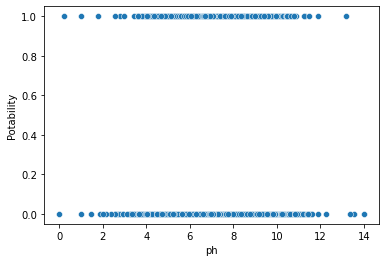

In [6]:
sns.scatterplot(x=data['ph'], y=data['Potability'])
plt.show()

In [7]:
data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

<AxesSubplot:>

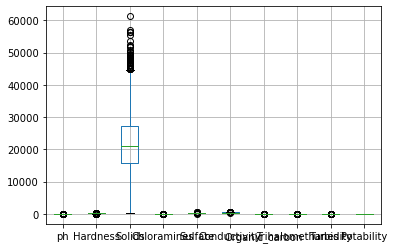

In [8]:
data.boxplot()

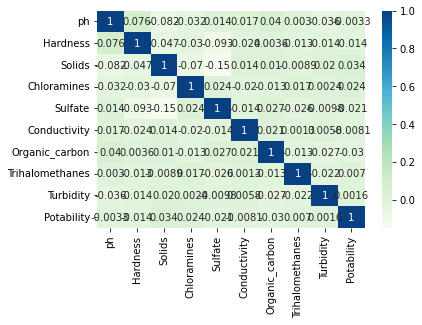

In [9]:
sns.heatmap(data.corr(), cmap='GnBu', annot=True,)
plt.show()

### Partioning

In [10]:
X=data.drop('Potability',axis=1)

In [11]:
y=data['Potability']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=101)

# Model Training

# Decision Tree

In [14]:
 from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(criterion='entropy',splitter='best',min_samples_split=9)
    

In [28]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
y_prediction=dt.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [18]:
accuracy_score(y_prediction,y_test)

0.5945121951219512

In [19]:
confusion_matrix(y_prediction,y_test)

array([[262, 126],
       [140, 128]], dtype=int64)

# Model Optimization / Hyper Parameter Tuning

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold


dt=DecisionTreeClassifier()

criterion=['gini','entropy']
splitter=['best','random']
min_samples_split=range(1,10)

grid=dict(criterion=criterion, splitter=splitter, min_samples_split=min_samples_split)
cv=RepeatedStratifiedKFold(n_splits=5,random_state=101)

grid_search_cv_dt= GridSearchCV(estimator=dt, param_grid=grid, scoring='accuracy',cv=cv)

In [21]:
grid_search_cv_dt.fit(X_train,y_train)

C:\Users\rawat\anaconda3\envs\requirements\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
200 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rawat\anaconda3\envs\requirements\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rawat\anaconda3\envs\requirements\lib\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "C:\Users\rawat\anaconda3\envs\requirements\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    check_scalar(
  File "C

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=101),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': range(1, 10),
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [22]:
print(grid_search_cv_dt.best_params_)

{'criterion': 'entropy', 'min_samples_split': 9, 'splitter': 'best'}


In [23]:
prediction_grid=grid_search_cv_dt.predict(X_test)

In [26]:
accuracy_score(y_test,prediction_grid)

0.5945121951219512

### Prediction on only one set of data by applying 2D array

In [29]:
dt.predict([[7,158,25689,7.8,377.59,579,14,75.96,4.9]])

C:\Users\rawat\anaconda3\envs\requirements\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)